In [12]:
import jax.numpy as jnp
import jax
import plotly.express as px

In [13]:
from mesh_generation import (icosphere, vertex_to_polar,
                             apply_pulsation, mesh_polar_vertices,
                            apply_spherical_harm_pulsation)

In [14]:
v, f, a, c, m, vm = icosphere(500)
pv, pf, pa, pc, pm = apply_pulsation(v, f, 2)

In [15]:
polar_vertices = mesh_polar_vertices(v)

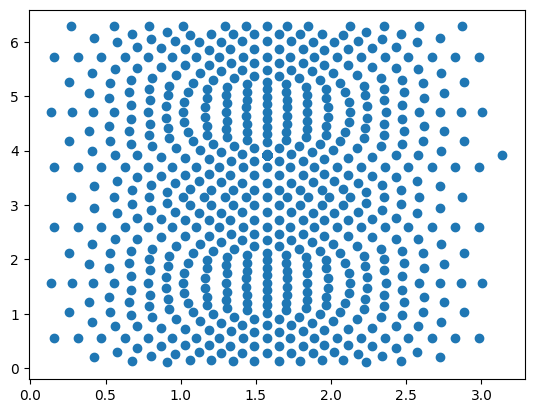

In [16]:
import matplotlib.pyplot as plt

plt.scatter(polar_vertices[:, 0], polar_vertices[:, 1]);

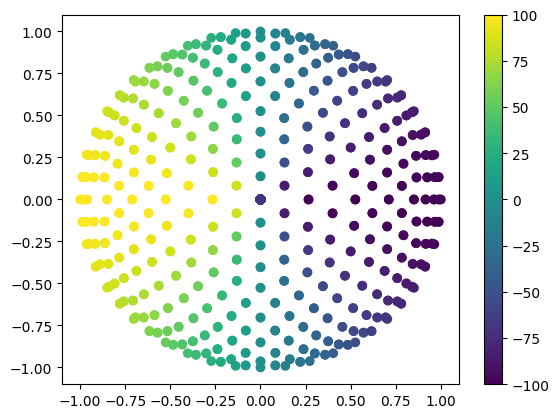

In [17]:
rot = 100
plt.scatter(v[:, 0], v[:, 1], c=rot*jnp.cos(polar_vertices[:, 1]))
plt.colorbar();

In [18]:
v.shape

(1272, 3)

In [33]:
sv, sf, sa, sc, sm = apply_spherical_harm_pulsation(v, f, .75, 0, 2.)

In [42]:
ampls = jnp.sin(jnp.linspace(-1, 1, 100))

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

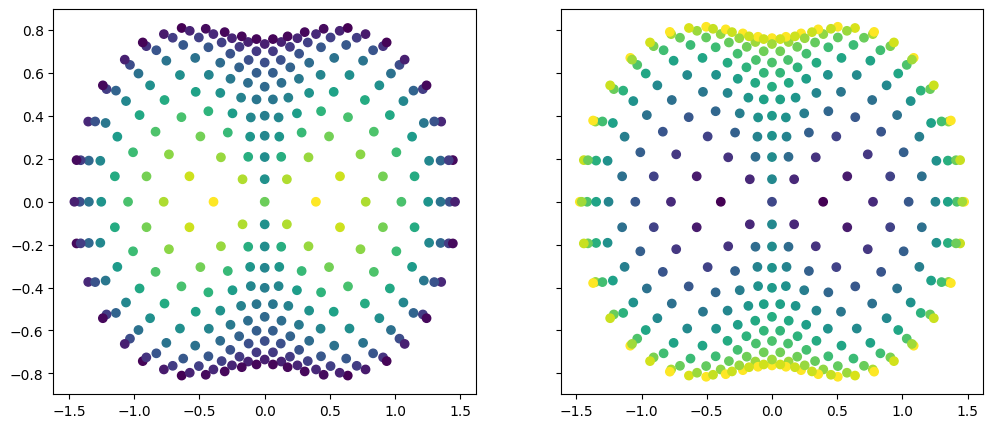

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5),
                               sharex=True, sharey=True)
pos = jnp.argwhere(sv[:, 2]>0)
neg = jnp.argwhere(sv[:, 2]<=0)
ax1.scatter(sv[pos, 0], sv[pos, 1], c=sv[pos, 2])
ax2.scatter(sv[neg, 0], sv[neg, 1], c=sv[neg, 2]);

In [38]:
sc.shape, sm.shape

((1280, 3), (1280,))

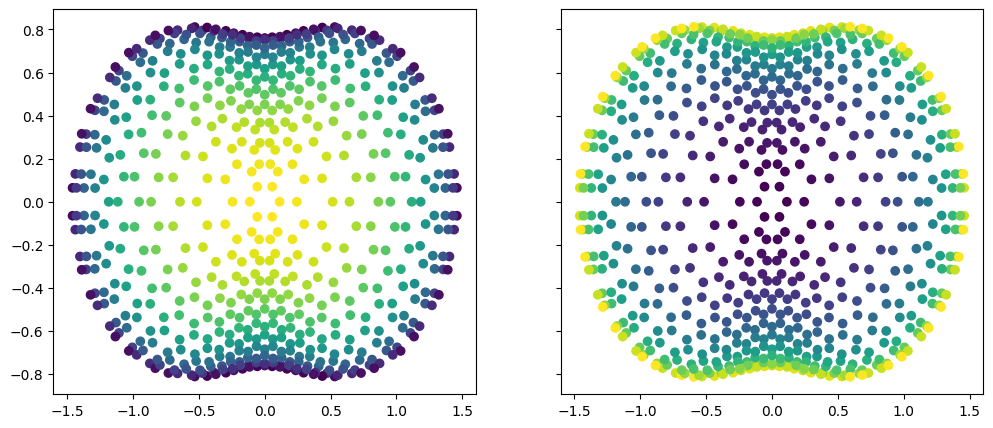

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
pos = jnp.argwhere(sc[:, 2]>0)
neg = jnp.argwhere(sc[:, 2]<=0)
ax1.scatter(sc[pos, 0], sc[pos, 1], c=sm[pos])
ax2.scatter(sc[neg, 0], sc[neg, 1], c=sm[neg])

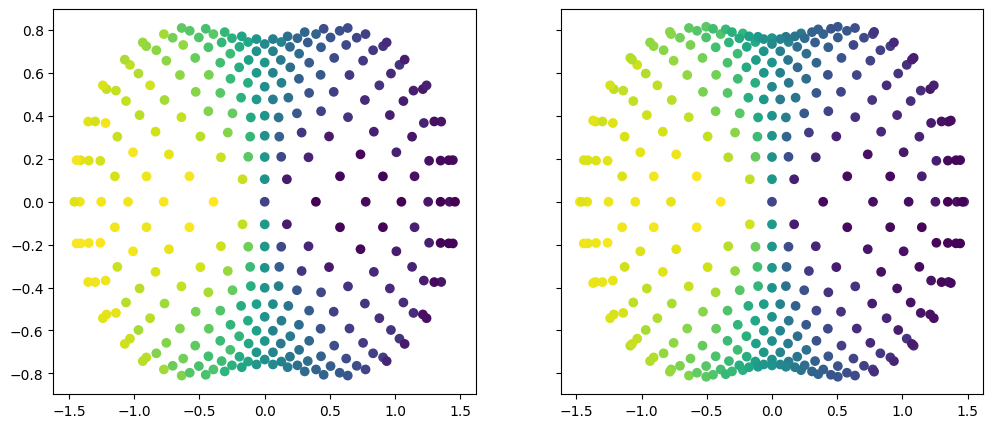

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
pos = jnp.argwhere(sv[:, 2]>0)
neg = jnp.argwhere(sv[:, 2]<=0)
ax1.scatter(sv[pos, 0], sv[pos, 1], c=sm[pos]+(10*jnp.cos(polar_vertices[pos, 1])))
ax2.scatter(sv[neg, 0], sv[neg, 1], c=sm[neg]+(10*jnp.cos(polar_vertices[neg, 1])))

In [10]:
# narysować mesh z trójkątami?

In [11]:
polar_vertices[:, 0]

Array([1.5707864, 1.5707864, 1.5707864, ..., 1.5707864, 1.5707864,
       1.5707864], dtype=float32)

In [53]:
ax.scatter([], [])

TypeError: cannot unpack non-iterable PathCollection object

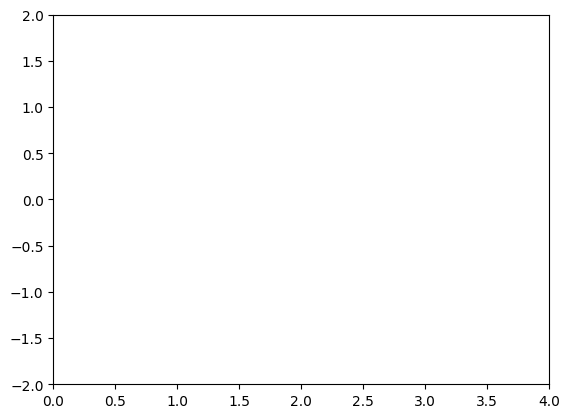

In [50]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
scat = ax.scatter([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    ampl = jnp.sin(i)
    sv, sf, sa, sc, sm = apply_spherical_harm_pulsation(v, f, ampl, 0, 2.)
    pos = jnp.argwhere(sv[:, 2]>0)
    line.set_data(sv[pos, 0], sv[pos, 1], c=sv[pos, 2])
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)


anim.save('pulse.gif', writer='imagemagick')

In [12]:
len(m[m<0]), len(m[m>0]) 

(624, 624)

In [13]:
pos_mask = jnp.argwhere(m>0)

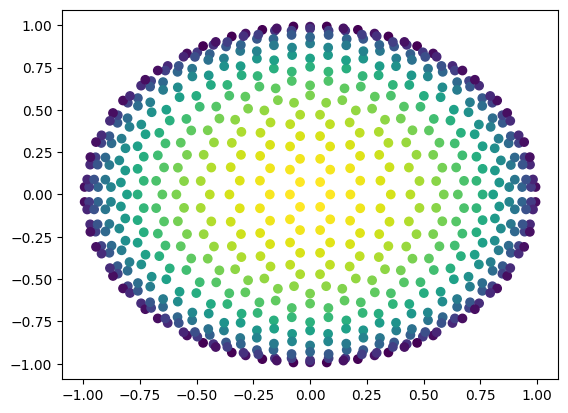

In [14]:
plt.scatter(c[pos_mask, 0], c[pos_mask, 1], c=m[pos_mask]);
#plt.scatter(pc[pos_mask, 0], pc[pos_mask, 1], c=m[pos_mask]);

In [15]:
relaxed_all = relax_all(nf.reshape((-1, 1024, 3))).reshape((-1, 3))

NameError: name 'relax_all' is not defined

In [ ]:
nf[:16]

In [ ]:
nf_test = nf.reshape((-1, 3))

In [ ]:
jnp.sum(jnp.all(nf!=-1, axis=1))

In [ ]:
jax.lax.dynamic_slice(nf, (0, 0), (20, 3))

In [ ]:
jax.lax.dynamic_slice(x, (0, 0), (16, 3))

In [ ]:
x = -1.*jnp.ones((16,3)).at[0].set(jnp.array([0., 0., 0.]))
x = x.at[1].set(jnp.array([1., 0., 0.]))
e(x)
#x

In [ ]:
jax.lax.slice(

In [ ]:
jnp.all(jnp.all(faces_r[0]==-1, axis=1))

In [ ]:
a = a.at[::4].set(jnp.ones(int(128/4)))

In [ ]:
a.shape

In [ ]:
a = jax.lax.dynamic_slice(a, jnp.ones(int(128/4)), [(0,), (1,)]) #jnp.arange(0, len(a), 4))

In [ ]:
a

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(v[:vc, 0], v[:vc, 1], c=v[:vc, 2]);
plt.scatter(nv[:nvc, 0], nv[:nvc, 1], c=nv[:nvc, 2]);

In [ ]:
areas, centers, mus = icosphere(1000)

In [ ]:
areas, centers, mus = icosphere(10000)

In [ ]:
import matplotlib.pyplot as plt

pos_centers = centers[mus>0]

plt.scatter(pos_centers[:, 0], pos_centers[:, 1], s=2., c=mus[mus>0])
plt.colorbar()

In [ ]:
scale = 1
subdiv = 4

PHI = (1 + jnp.sqrt(5)) / 2

def vertex(x, y, z):
    """ Return vertex coordinates fixed to the unit sphere """

    length = jnp.sqrt(jnp.power(x, 2) + jnp.power(y, 2) + jnp.power(z, 2))
    
    coords = jnp.array([x, y, z])

    return (coords*scale)/length

In [ ]:
# Number of vertices and faces, solved in wolfram

# 12 + 3*(faces-1) = 
# faces: 4*(faces-1)

# faces: f(n)=5*4^(n+1)
# vertices: v(n) = 4*(5*4^n-2)

In [ ]:
# 0: f(0) = 4*5 = 20
# 0: v(0) = 4*(5-2) = 12

# 1: f(1) = 5*4^2 = 80
# 1: v(1) = 4*(20-2) = 72

In [ ]:
vertex(-1, -PHI, 0).astype(int)

In [ ]:
verts = jnp.array([
          vertex(-1,  PHI, 0),
          vertex( 1,  PHI, 0),
          vertex(-1, -PHI, 0),
          vertex( 1, -PHI, 0),

          vertex(0, -1, PHI),
          vertex(0,  1, PHI),
          vertex(0, -1, -PHI),
          vertex(0,  1, -PHI),

          vertex( PHI, 0, -1),
          vertex( PHI, 0,  1),
          vertex(-PHI, 0, -1),
          vertex(-PHI, 0,  1),
        ])

verts_total_size = int(4*(5*jnp.power(4, subdiv)-2))

verts_jax = jnp.zeros((verts_total_size, 3))
verts_jax = verts_jax.at[:12].set(verts)
verts_jax_mask = jnp.concatenate([jnp.ones(12), jnp.zeros(verts_total_size-12)], axis=0).astype(bool)

faces_total_size = int(5*jnp.power(4, subdiv+1))

faces = [
         # 5 faces around point 0
         [0, 11, 5],
         [0, 5, 1],
         [0, 1, 7],
         [0, 7, 10],
         [0, 10, 11],

         # Adjacent faces
         [1, 5, 9],
         [5, 11, 4],
         [11, 10, 2],
         [10, 7, 6],
         [7, 1, 8],

         # 5 faces around 3
         [3, 9, 4],
         [3, 4, 2],
         [3, 2, 6],
         [3, 6, 8],
         [3, 8, 9],

         # Adjacent faces
         [4, 9, 5],
         [2, 4, 11],
         [6, 2, 10],
         [8, 6, 7],
         [9, 8, 1],
]

faces_jax = jnp.array(faces)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pos_verts = np.array(verts_jax[verts_jax_mask][verts_jax[verts_jax_mask, 2]>0.])
plt.scatter(pos_verts[:, 0], pos_verts[:, 1], c=pos_verts[:, 2], alpha=.5);

In [ ]:
middle_point_cache = {}
verts = verts_jax

def middle_point(point_1, point_2, verts, verts_jax_mask, middle_point_cache):
    """ Find a middle point and project to the unit sphere """
    # We check if we have already cut this edge first
    # to avoid duplicated verts
    smaller_index, greater_index = jax.lax.cond(point_1<point_2, lambda: (point_1, point_2), lambda: (point_2, point_1))

    key = '{0}-{1}'.format(smaller_index, greater_index)
    
    def expand_verts(verts, verts_jax_mask, point_1, point_2, middle_point_cache):
        # If it's not in cache, then we can cut it
        loc_verts = jnp.array([verts[point_1],
                               verts[point_2]]).T
        middle = jnp.sum(loc_verts, axis=1)/2

        index = jnp.sum(verts_jax_mask)
        verts = verts.at[index].set(vertex(*middle))
        verts_jax_mask = verts_jax_mask.at[index].set(1)

        middle_point_cache = middle_point_cache.at[smaller_index, greater_index].set(index)

        return index, verts, verts_jax_mask, middle_point_cache
    
    maybe_index = middle_point_cache[smaller_index, greater_index]
    return jax.lax.cond(maybe_index>0,
                        lambda: (maybe_index, verts, verts_jax_mask, middle_point_cache),
                        lambda: expand_verts(verts, verts_jax_mask, point_1, point_2, middle_point_cache))

In [ ]:
faces = np.array(faces)

In [ ]:
import jax

In [ ]:
# for i in range(subdiv):
#     faces_subdiv = []

#     for tri in faces:
#         v1 = middle_point(tri[0], tri[1])
#         v2 = middle_point(tri[1], tri[2])
#         v3 = middle_point(tri[2], tri[0])

#         faces_subdiv.append([tri[0], v1, v3])
#         faces_subdiv.append([tri[1], v2, v1])
#         faces_subdiv.append([tri[2], v3, v2])
#         faces_subdiv.append([v1, v2, v3])

#     faces = faces_subdiv
    
    
def subdivide_trie(carry, tri):
    verts, verts_jax_mask, middle_point_cache = carry
    v1, verts, verts_jax_mask, middle_point_cache = middle_point(tri[0], tri[1], verts, verts_jax_mask, middle_point_cache)
    v2, verts, verts_jax_mask, middle_point_cache = middle_point(tri[1], tri[2], verts, verts_jax_mask, middle_point_cache)
    v3, verts, verts_jax_mask, middle_point_cache = middle_point(tri[2], tri[0], verts, verts_jax_mask, middle_point_cache)

    return (verts, verts_jax_mask, middle_point_cache), jnp.array([[tri[0], v1, v3],
                      [tri[1], v2, v1],
                      [tri[2], v3, v2],
                      [v1, v2, v3]])

def subdivide(faces, verts, verts_jax_mask):
    keys_cache = (-1*jnp.ones((verts_total_size, verts_total_size))).astype(int)
    (verts, verts_jax_mask, _), faces = jax.lax.scan(subdivide_trie, (verts, verts_jax_mask, keys_cache), faces)
    return verts, verts_jax_mask, faces.reshape((-1, 3))

In [ ]:
verts, mask, faces = subdivide(faces_jax, verts, verts_jax_mask)
verts, mask, faces = subdivide(faces, verts, mask)

In [ ]:
verts.shape

In [ ]:
verts[mask].shape

In [ ]:
verts_m = verts[mask]
plt.scatter(verts_m[:, 0], verts_m[:, 1])

In [ ]:
import numpy as np

In [ ]:
# centers = []
# areas = []

# for face in faces:
#     a, b, c = verts[face[0]], verts[face[1]], verts[face[2]]
#     ab = b-a
#     ac = c-a
#     A = np.linalg.norm(np.cross(ab, ac))/2
#     areas.append(A)
#     centers.append((a+b+c)/3)

def face_center(verts, face):
    a, b, c = verts[face[0]], verts[face[1]], verts[face[2]]
    ab = b-a
    ac = c-a
    A = jnp.linalg.norm(jnp.cross(ab, ac))/2
    return A, (a+b+c)/3

In [ ]:
areas, centers = jax.vmap(face_center, in_axes=(None, 0))(verts, faces)

In [ ]:
np_verts = np.array(verts)
np_centers = np.array(centers)
pos_verts = np_verts[np_verts[:, 2]>0.]
pos_centers = np_centers[np_centers[:, 2]>0.]

plt.scatter(pos_verts[:, 0], pos_verts[:, 1], c=pos_verts[:, 2], s=2.);
plt.scatter(pos_centers[:, 0], pos_centers[:, 1], color='red', s=2.)

In [ ]:
np.max(np.dot(pos_centers/np.linalg.norm(pos_centers, axis=1).reshape((-1, 1)), np.array([0, 0, 1])))

In [ ]:
(pos_centers/np.linalg.norm(pos_centers, axis=0)).shape

In [ ]:
mus = np.dot(pos_centers/np.linalg.norm(pos_centers, axis=1).reshape((-1, 1)), np.array([0, 0, 1]))

In [ ]:
np.min(mus), np.max(mus)

In [ ]:
plt.scatter(pos_centers[:, 0], pos_centers[:, 1], c = mus, s=2.)

In [ ]:
from mesh_generation import icosphere